In [2]:
# install missing packets in jupyter notebook
!pip install cmdstanpy
!pip install arviz
!pip install scipy
!pip install ipywidgets widgetsnbextension pandas-profiling

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
F = len("Natalia")
L = len("Pluta")

## Excercise 1 -  Generated Quantities Block

In [5]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
# task 1
samples = gen_quant.sample(data={'M':F}, 
                           fixed_param=True, 
                           iter_sampling=1000, 
                           iter_warmup=0, 
                           chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


   lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0   0.0            0.0  270.0170     286.0     292.0     288.0     301.0   
1   0.0            0.0   12.9182      14.0       8.0      10.0      16.0   
2   0.0            0.0  187.8160     182.0     185.0     183.0     197.0   
3   0.0            0.0   34.0473      41.0      34.0      43.0      31.0   
4   0.0            0.0  119.5670     121.0     102.0     109.0     133.0   

   y_sim[5]  y_sim[6]  y_sim[7]  
0     250.0     251.0     276.0  
1      17.0      14.0      14.0  
2     192.0     213.0     181.0  
3      39.0      24.0      34.0  
4     109.0     105.0     129.0  
['lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]', 'y_sim[4]', 'y_sim[5]', 'y_sim[6]', 'y_sim[7]']


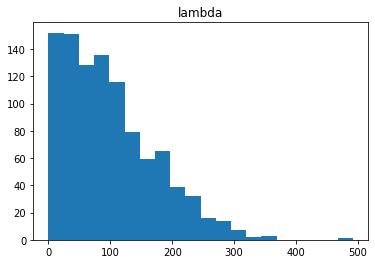

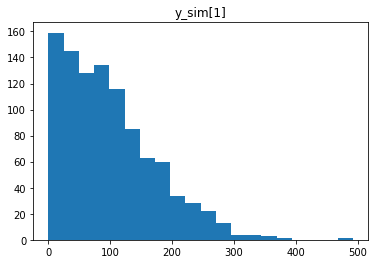

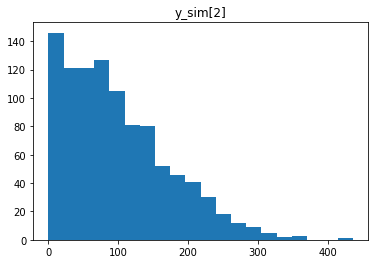

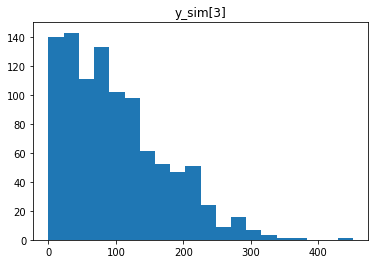

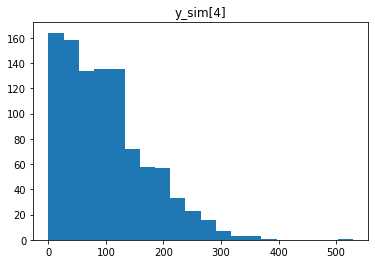

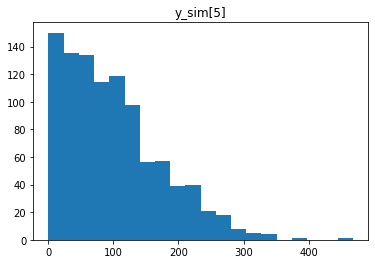

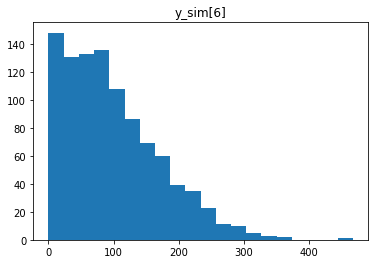

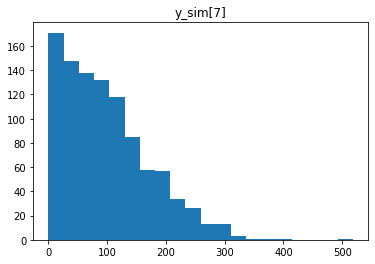

In [7]:
# task 2
df = samples.draws_pd()
print(df.head())

# task 3
columns = ["lambda"]+[f"y_sim[{i}]" for i in range(1, F+1)]
print(columns)

for column in columns:
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.show()

## Excercise 2 - Constraints on the data 

In [8]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df_bern1 = samp_bern1.draws_pd()
print(df_bern1.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -2.77281       0.999188     1.11994          1.0           3.0          0.0   
1 -3.14505       0.896870     1.11994          1.0           3.0          0.0   
2 -4.50987       0.730255     1.11994          1.0           3.0          0.0   
3 -4.55786       0.993103     1.11994          1.0           1.0          0.0   
4 -5.08925       0.934860     1.11994          1.0           1.0          0.0   

   energy__     theta  
0   2.95247  0.494715  
1   3.17361  0.293895  
2   4.51138  0.119055  
3   4.94484  0.115804  
4   5.33093  0.085878  


In [9]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df_bern2 = samp_bern2.draws_pd()
print(df_bern2.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -3.18511       1.000000    0.941331          1.0           1.0          0.0   
1 -2.99279       1.000000    0.941331          2.0           3.0          0.0   
2 -2.90508       1.000000    0.941331          1.0           1.0          0.0   
3 -2.80625       0.988281    0.941331          1.0           3.0          0.0   
4 -2.77369       0.997976    0.941331          2.0           3.0          0.0   

   energy__     theta  
0   3.32551  0.284143  
1   3.16158  0.338555  
2   2.98933  0.373413  
3   2.99010  0.564592  
4   2.81893  0.511735  


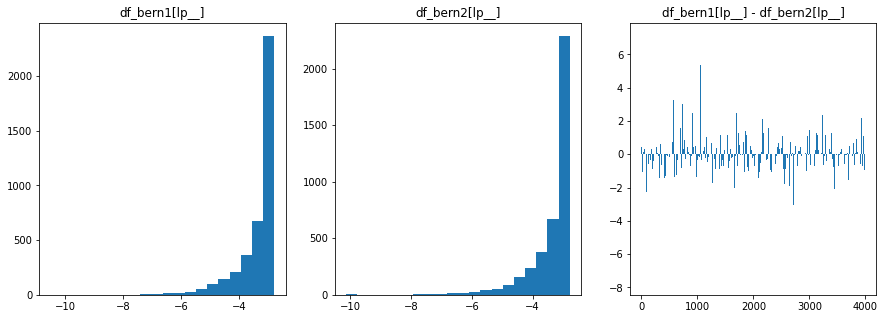

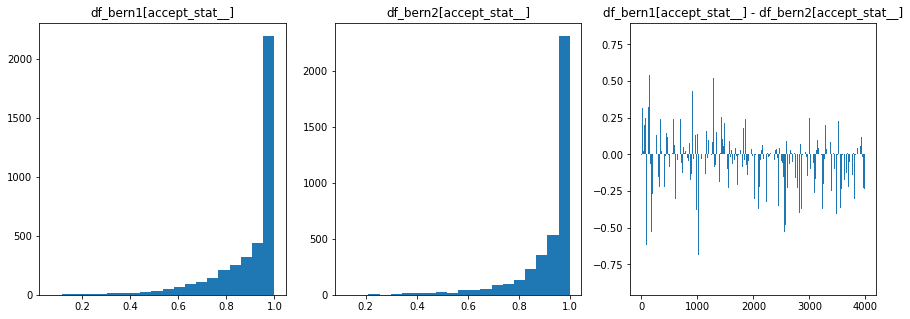

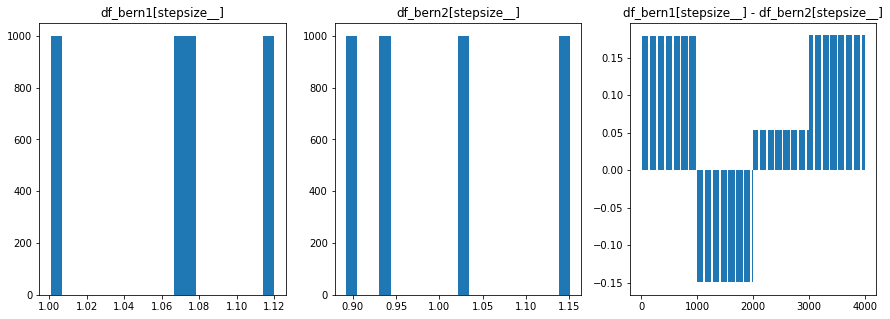

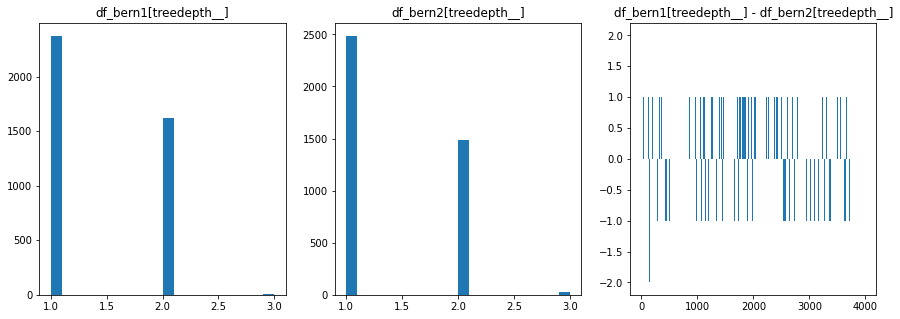

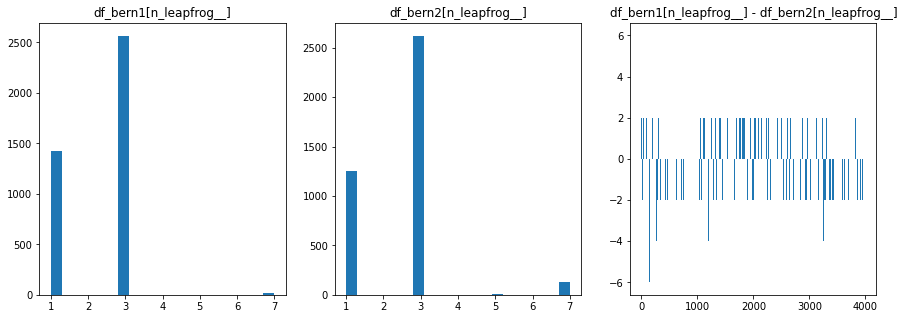

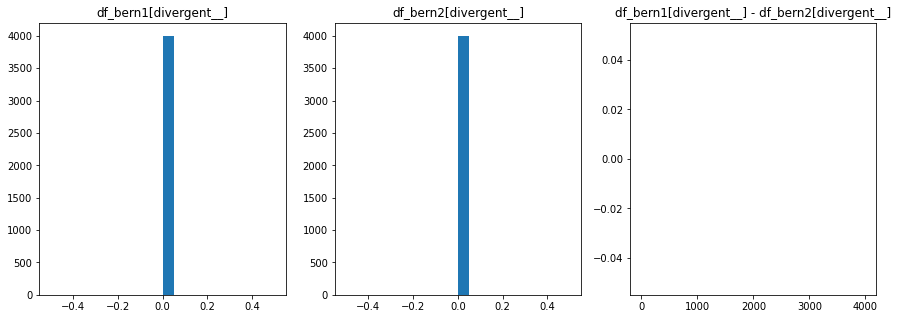

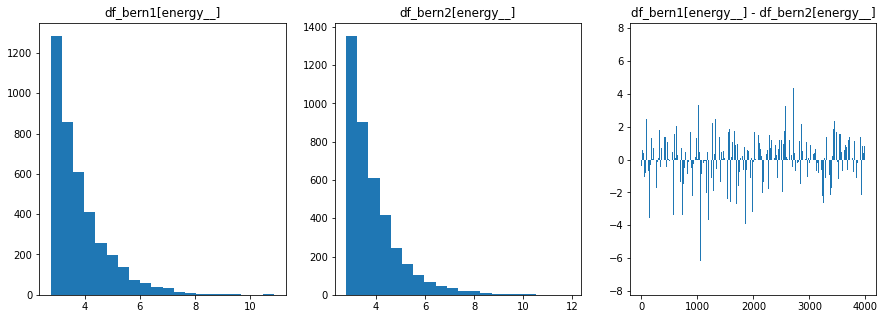

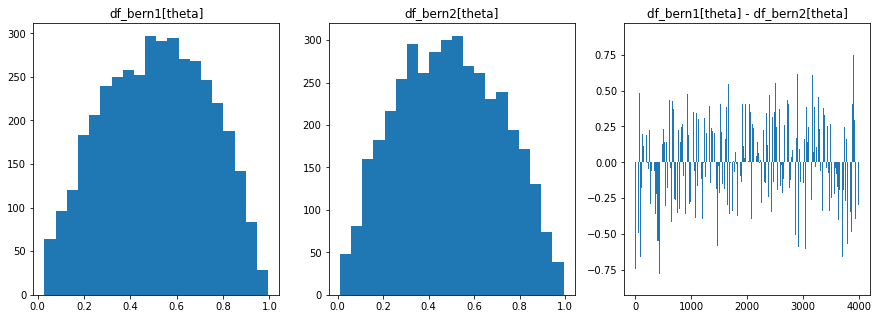

In [10]:
columns = df_bern1.columns
# plot 3 histograms in one row

for column in columns:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].hist(df_bern1[column], bins=20)
    axs[0].set_title(f"df_bern1[{column}]")
    axs[1].hist(df_bern2[column], bins=20)
    axs[1].set_title(f"df_bern2[{column}]")
    diff = [(a - b) for a, b in zip(df_bern1[column], df_bern2[column])]
    axs[2].bar(range(len(diff)), diff)
    axs[2].set_title(f"df_bern1[{column}] - df_bern2[{column}]")
    plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [11]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320030840_1.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320030840_2.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320030840_3.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_4-20230320030840_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

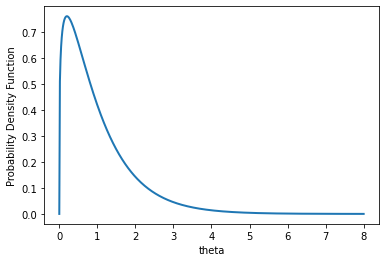

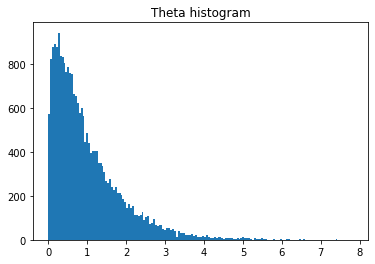

In [12]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
plt.hist(out_gamma1.stan_variable('theta'), bins=160)
plt.title("Theta histogram")
plt.show()


### Constrained parameter

In [13]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320030842_1.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320030842_2.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320030842_3.csv, /usr/data-analytics-lectures/Data Analytics/Lab 2/samples/code_5-20230320030842_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

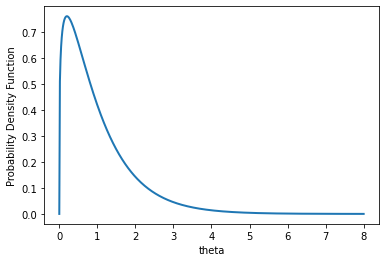

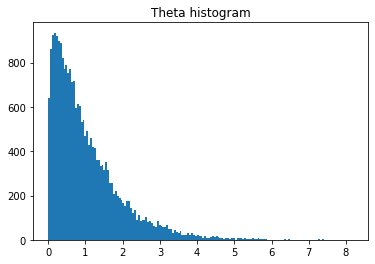

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples from the second model with 160 bins
plt.hist(out_gamma2.stan_variable('theta'), bins=160)
plt.title("Theta histogram")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [15]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len("Natalia") # number of letters in the first name
L = len("Pluta") # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
      'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


## Excercise 5 - different methods of defining models


In [16]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
seed = 9071999
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


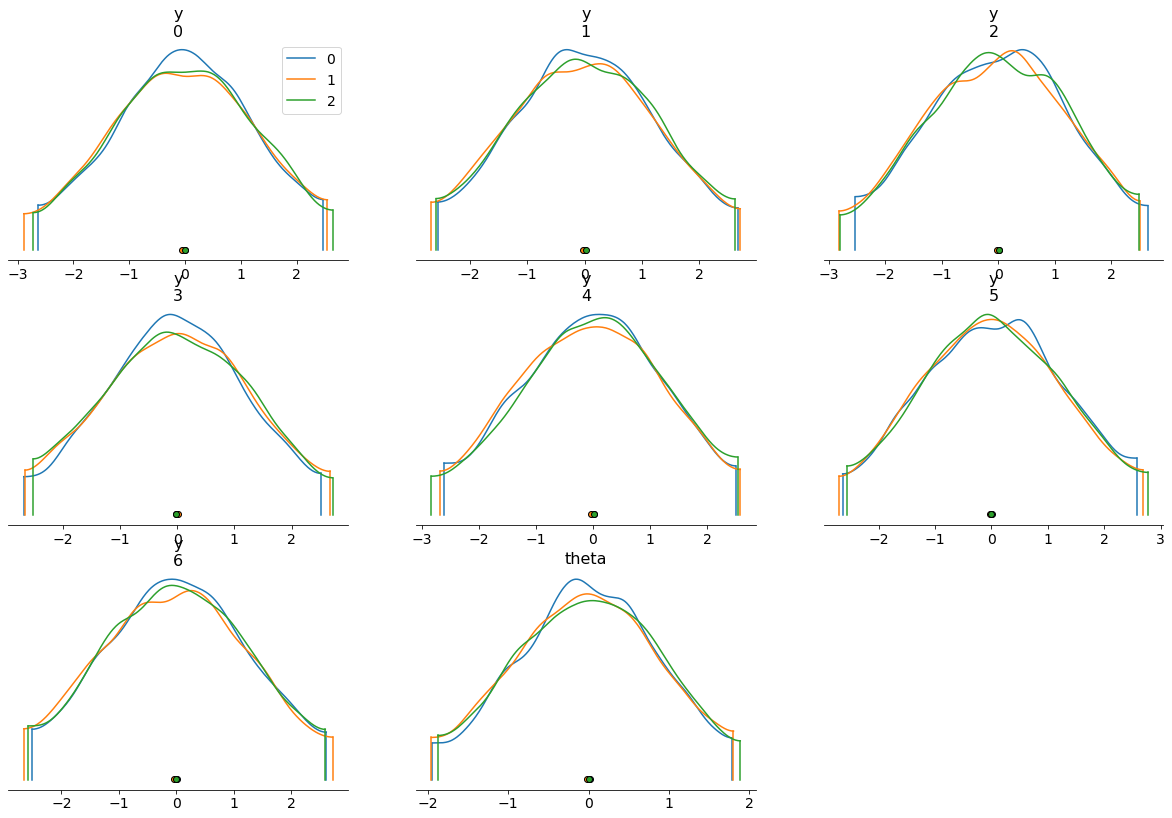

In [17]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [18]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable

SyntaxError: invalid syntax (1329086258.py, line 4)